<h3>1. Import Librarys</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
%matplotlib inline
fig = plt.figure(figsize = (18,10))

<Figure size 1296x720 with 0 Axes>

<h3>2. Import data sets</h3>

In [2]:
#Import the dataset   
train = pd.read_csv('train_data.csv') 
test = pd.read_csv('test.csv') 

<h3>3. Deal With Missing Data</h3>

<p>Columns with too much missing data will be difficult to work with. For this case we will remove columns with more than 15% missing data.</p>

In [3]:
to_drop = ['Id']
for col in train:
    if train[col].isnull().sum() >= train.shape[0]*.15:
        to_drop.append(col)
train.drop(columns=to_drop, inplace=True)
test.drop(columns=to_drop, inplace=True)

In [4]:
to_drop

['Id', 'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Columns dropped due to having 15% Null data : 

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

<h3>4. Encode Data</h3>

In [5]:
def encode(df):
    to_encode = []
    for col in df:
        if df[col].dtypes != 'int64' and df[col].dtypes != 'float64':
            to_encode.append(col)
    for col in to_encode:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [6]:
train = encode(train)
test = encode(test)

In [7]:
train["SalePrice"] = np.log(train["SalePrice"])

In [8]:
corrs = train.corr()
corrs2 = corrs["SalePrice"]
neg_corrs = corrs2[corrs2<0]
for i in neg_corrs.index:
    test[i] = 1-test[i]
    train[i] = 1-train[i]
corrs = train.corr()
corrs3 = corrs["SalePrice"][corrs["SalePrice"]>.69].sort_values(ascending=False)
corrs3.drop(index=['SalePrice'], inplace = True)
corrs3 = corrs3.to_frame()
corrs3.style.background_gradient(cmap='coolwarm')


,SalePrice
OverallQual,0.817184
GrLivArea,0.700927


<h3>5. Normalize Data</h3>

After removing columns we will work with the data to impute values using Ks Nearest Neighbor

In [9]:
good =corrs3.index

In [10]:
imputer = SimpleImputer()
train_filled = imputer.fit_transform(train[good])

In [11]:
train_filled_df = pd.DataFrame(train_filled, columns=good)

In [12]:
for col in train_filled_df:
    train[col] = train_filled_df[col]

In [13]:
y = train['SalePrice']

<h3>6. Visualize Data</h3>

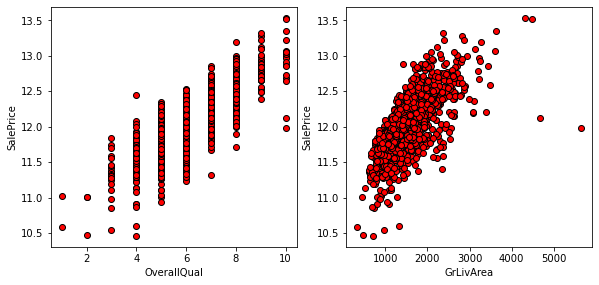

In [14]:
fig = plt.figure(figsize = (15,15))
i=1
for row in good:
    fig.add_subplot(3,3,i)
    plt.scatter(x = train[row], y = train['SalePrice'], color = "red", edgecolor = 'k')
    plt.xlabel(row)
    plt.ylabel("SalePrice")
    i+=1


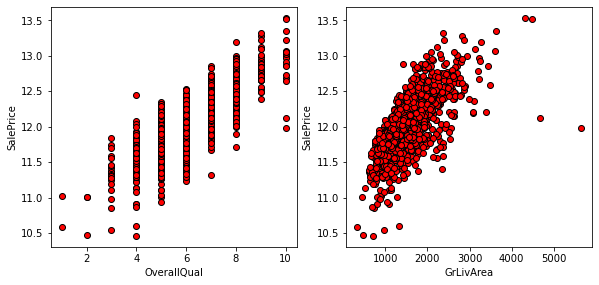

<Figure size 1080x1080 with 0 Axes>

In [15]:
fig = plt.figure(figsize = (15,15))
i=1
for row in good:
    fig.add_subplot(3,3,i)
    plt.scatter(x = train[row], y = train['SalePrice'], color = "red", edgecolor = 'k')
    plt.xlabel(row)
    plt.ylabel("SalePrice")
    i+=1
fig = plt.figure(figsize = (15,15))

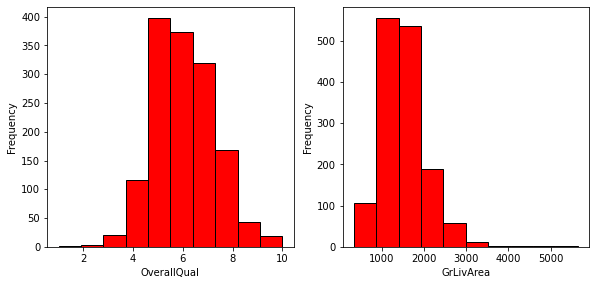

In [16]:
fig = plt.figure(figsize = (15,15))
i=1
for row in good:
    fig.add_subplot(3,3,i)
    plt.hist(x = train[row], color = "red", edgecolor = 'k')
    plt.xlabel(row)
    plt.ylabel("Frequency")
    i+=1


In [17]:
stats = train.describe()
stats.drop(index=['count'],inplace = True)
stats

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
mean,-55.897260,-2.028767,10516.828082,0.995890,-0.942466,2.777397,0.999315,-2.019178,0.062329,12.251370,...,-20.954110,3.409589,15.060959,2.758904,-42.489041,6.321918,-2006.815753,-6.513014,3.770548,12.024051
std,42.300571,0.632017,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,0.399452
min,-189.000000,-3.000000,1300.000000,0.000000,-2.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,...,-551.000000,0.000000,0.000000,0.000000,-15499.000000,1.000000,-2009.000000,-7.000000,0.000000,10.460242
25%,-69.000000,-2.000000,7553.500000,1.000000,-2.000000,3.000000,1.000000,-3.000000,0.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,-2008.000000,-7.000000,4.000000,11.775097
50%,-49.000000,-2.000000,9478.500000,1.000000,-2.000000,3.000000,1.000000,-3.000000,0.000000,12.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,-2007.000000,-7.000000,4.000000,12.001505
75%,-19.000000,-2.000000,11601.500000,1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,17.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,8.000000,-2006.000000,-7.000000,4.000000,12.273731
max,-19.000000,1.000000,215245.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,24.000000,...,1.000000,508.000000,480.000000,738.000000,1.000000,12.000000,-2005.000000,1.000000,5.000000,13.534473


<h3>7. Machine Learning: Linear Regression</h3>

In [18]:
x = train[good]
X_train,X_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.1)

In [19]:
y_train

array([12.07767093, 12.99453001, 12.26904744, ..., 12.2869012 ,
       11.91371298, 11.84510278])

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
model_acc_train = explained_variance_score(y_test, y_pred)
model_acc_train

0.7703601980790665

In [23]:
model_rmse_train = mean_squared_error(y_test, y_pred, squared=False)
model_rmse_train

0.18951090440992965

<h3> Visualize Accuracy</h3>

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [25]:
df['Diff'] = df['Actual']- df['Predicted']
df1 = df.head(25)
df1

,Actual,Predicted,Diff
0,12.567237,12.715978,-0.148741
1,11.744037,11.886095,-0.142058
2,11.951180,12.090087,-0.138906
3,11.763684,11.662797,0.100887
4,12.043554,11.897645,0.145909
5,12.195517,12.060570,0.134947
6,12.669807,12.417221,0.252586
7,11.575900,11.667417,-0.091517
8,11.619535,11.485755,0.133780
9,12.013640,12.131353,-0.117713


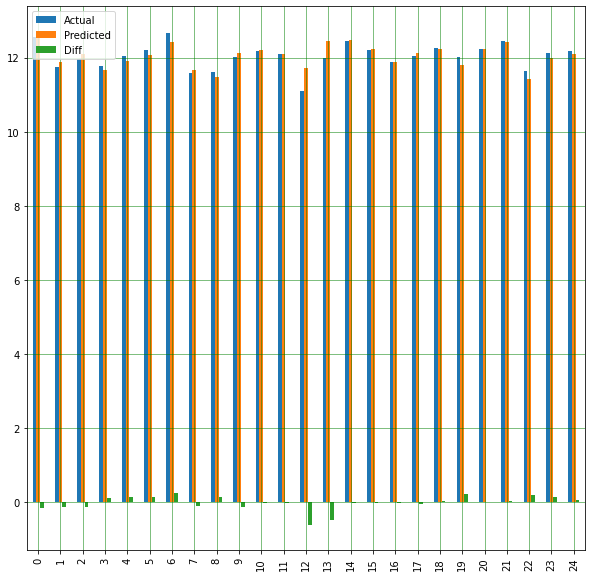

In [26]:
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
imputer = SimpleImputer()
test_filled = imputer.fit_transform(test[good])

In [28]:
test_filled_df = pd.DataFrame(test_filled, columns=good)

In [29]:
for col in test_filled_df:
    test[col] = test_filled_df[col]

In [30]:
X_train = train[good]
y_train = train['SalePrice']
X_test = test[good]

In [31]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred =np.e**regressor.predict(test[good])

In [34]:
y_pred_frame = pd.DataFrame(y_pred)

In [35]:
y_pred_frame.head()

,0
0,117041.727836
1,156215.326956
2,140956.308454
3,167500.587200
4,220646.696893


In [36]:
y_pred_frame.index = np.arange(1461, len(y_pred_frame)+1461)

In [37]:
y_pred_frame.to_csv('submission.csv', sep=',')